In [234]:
# Add Matplotlib inline magic command
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [235]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [236]:
# read the city data file and store it in the pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [237]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [238]:
# get columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [239]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [240]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [241]:
# Get unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [242]:
# Get data points for urban cities
sum(city_data_df['type'] == 'Urban')

66

In [243]:
sum(city_data_df['type'] == 'Suburban')

36

In [244]:
sum(city_data_df['type'] == 'Rural')

18

In [245]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [246]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [247]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [248]:
# combine data into single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on=["city", "city"])

#display df
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [249]:
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [250]:
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [251]:
# get count of rides across diff city types
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [252]:
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [253]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [254]:
# get average fare across diff city type
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [255]:
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

In [256]:
# get average number of drivers across each city type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [257]:
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

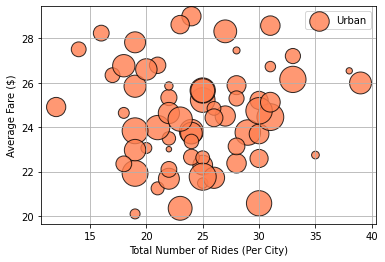

In [258]:
# build scatter plot for urban citites
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=10*urban_driver_count,
           c = 'coral',
           label = 'Urban',
           edgecolor = 'black',
           alpha = .8,
           linewidths = 1)

plt.legend()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

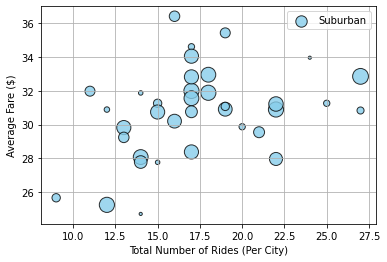

In [259]:
# build scatter plot for suburban citites
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=10*suburban_driver_count,
           c = 'skyblue',
           label = 'Suburban',
           edgecolor = 'black',
           alpha = .8,
           linewidths = 1)

plt.legend()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

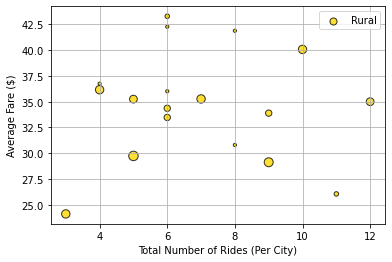

In [260]:
# build scatter plot for rural citites
plt.scatter(rural_ride_count,
            rural_avg_fare,
           s= 10 * rural_driver_count,
           c = 'gold',
           label = 'Rural',
           edgecolor = 'black',
           alpha = .8,
           linewidths = 1)

plt.legend()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

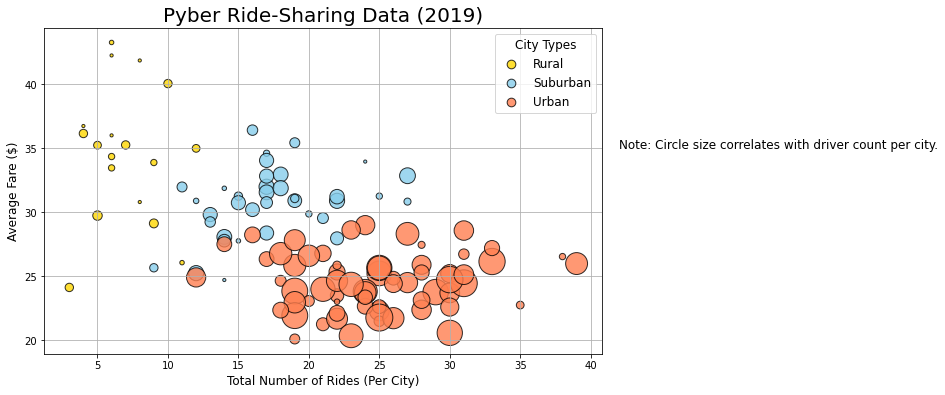

In [261]:
# combine scateer charts
plt.subplots(figsize= (10,6))
plt.scatter(rural_ride_count,
            rural_avg_fare,
           s= 10 * rural_driver_count,
           c = 'gold',
           label = 'Rural',
           edgecolor = 'black',
           alpha = .8,
           linewidths = 1)

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=10*suburban_driver_count,
           c = 'skyblue',
           label = 'Suburban',
           edgecolor = 'black',
           alpha = .8,
           linewidths = 1)

plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=10*urban_driver_count,
           c = 'coral',
           label = 'Urban',
           edgecolor = 'black',
           alpha = .8,
           linewidths = 1)

plt.title('Pyber Ride-Sharing Data (2019)', fontsize = 20)
plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare ($)', fontsize= 12)
plt.grid(True)

#create a legend
lgnd = plt.legend(fontsize = '12',
          mode = 'Expanded',
          scatterpoints = 1,
          loc  = 'best',
          title = 'City Types')

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# incorporate a text label about circle size 
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize = '12')

# save the figure 
plt.savefig('Analysis/Fig1.png',bbox_inches = 'tight',facecolor ='w')

In [262]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [263]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [264]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [265]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [266]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [267]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [268]:
# calc mean reide count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [269]:
round(urban_ride_count.median(),2)

24.0

In [270]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [271]:
suburban_ride_count.mode()

0    17
dtype: int64

In [272]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.')



The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.


In [273]:
mode_urban_ride_count = sts.mode(urban_ride_count)
#print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count:.2f}.')
# mode_urban_ride_count
print(f"The mode is {mode_urban_ride_count}.")

The mode is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [274]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
mode_suburban_ride_count

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [275]:
mode_rural_ride_count = sts.mode(rural_ride_count)
mode_rural_ride_count

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [276]:
# Get the fares from the urban cities
urban_fares = urban_cities_df['fare']
urban_fares.head()

rural_fares = rural_cities_df['fare']
suburban_fares = suburban_cities_df['fare']

In [277]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare for urban cities is {mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare for urban cities is {median_urban_fares}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare for urban cicites is {mode_urban_fares}.")

The mean fare for urban cities is 24.53.
The median fare for urban cities is 24.64.
The mode fare for urban cicites is ModeResult(mode=array([22.86]), count=array([5])).


In [278]:
mean_suburban_fares = np.mean(suburban_fares)
mean_rural_fares = np.mean(rural_fares)
mean_suburban_fares


30.97012800000002

In [279]:
mean_rural_fares

34.623440000000016

In [280]:
# Get the urban driver count from the urban cities df
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [281]:
mean_urban_drivers = np.mean(urban_drivers)
print(f'mean urban drivers {mean_urban_drivers:.2f}')

mean_suburban_drivers = np.mean(suburban_drivers)
print(f'mean subs drivers {mean_suburban_drivers:.2f}')

mean_rural_drivers = np.mean(rural_drivers)
print(f'mean rural drivers {mean_rural_drivers:.2f}')

mean urban drivers 36.68
mean subs drivers 13.71
mean rural drivers 4.30


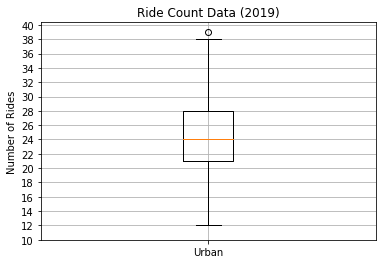

In [282]:
# create a box and whisker plot for urban cities ride count 
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

#add title, yaxis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step = 2.0))
ax.grid()
plt.show()

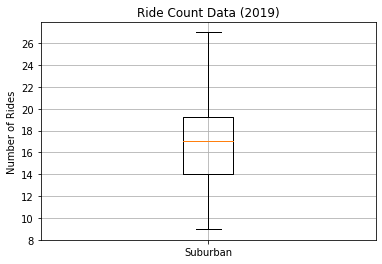

In [283]:
# create a box and whikser plot for suburban cities
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)

#add title, yaxis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(8,28, step = 2.0))
ax.grid()
plt.show()

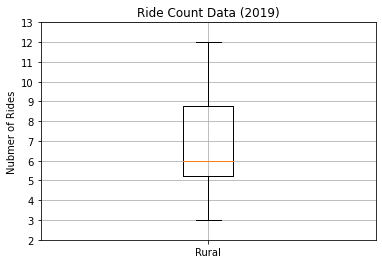

In [284]:
# create a box and whikser plot for rural citites 
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)

#set title, grid, yaxis labels
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Nubmer of Rides')
ax.set_yticks(np.arange(2,14, step=1.0))
ax.grid()
plt.show()

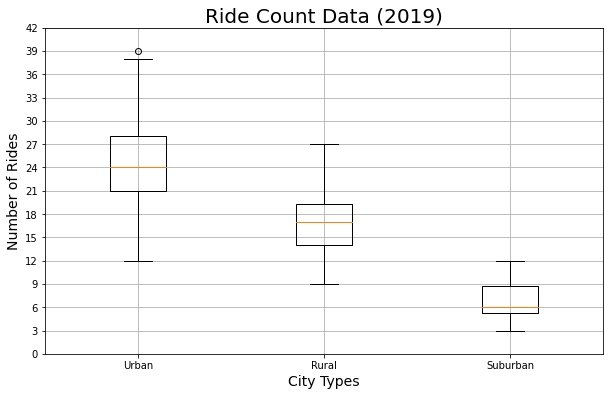

In [285]:
# Add them all to the same graph 
x_labels = ['Urban', 'Rural', 'Suburban']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax= plt.subplots(figsize = (10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_xlabel('City Types', fontsize = 14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0,45, step = 3.0))
ax.grid()

#save the figure
plt.savefig('analysis/Fig2.png',bbox_inches ='tight',facecolor ='w')
plt.show()

In [286]:
# Get city that matches 39 rides
urban_city_outlier = urban_ride_count[urban_ride_count ==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


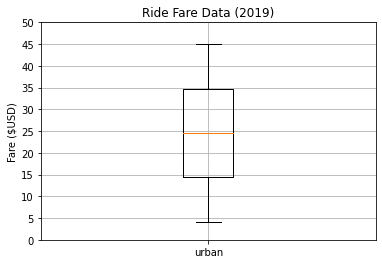

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [287]:
# create a box and whisker tplot for urban fare data
x_labels = ['urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

#add title, y labels and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,51,step = 5.0))
ax.grid()
plt.show()

print('Summary Statistics')
urban_fares.describe()

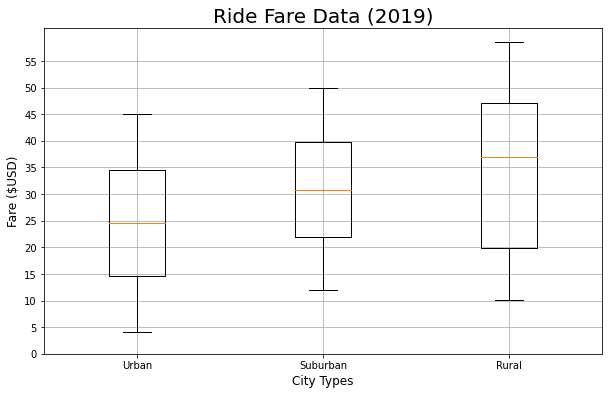

In [288]:
x_labels = ['Urban','Suburban', 'Rural']
fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(fare_data, labels = x_labels)

ax.set_title('Ride Fare Data (2019)', fontsize = 20)
ax.set_xlabel('City Types', fontsize = 12)
ax.set_ylabel('Fare ($USD)', fontsize = 12)
ax.set_yticks(np.arange(0,60,step = 5.0))
ax.grid()

plt.savefig('analysis/Fig3.png', bbox_inches = 'tight',facecolor = 'w')
plt.show()

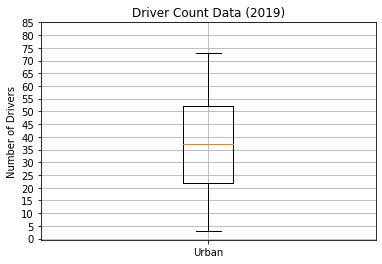

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [289]:
# create box and whikser plots for the urban driver count data 
x_labels = ['Urban']

fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,90,step = 5.0))
ax.grid()
plt.show()

print('Summary Statistics')
urban_drivers.describe()

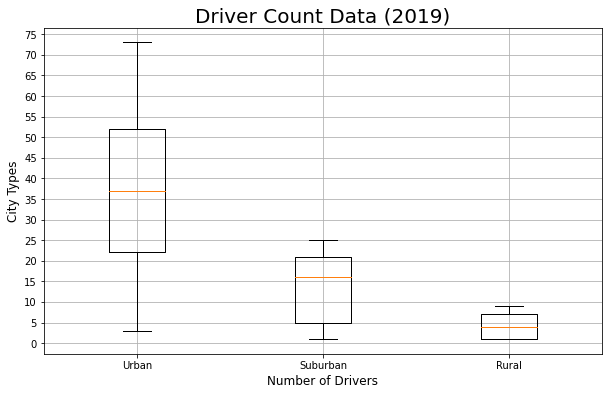

In [290]:
x_labels = ['Urban', 'Suburban', 'Rural']
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize= (10,6))
ax.boxplot(driver_count_data, labels = x_labels)

ax.set_title('Driver Count Data (2019)', fontsize = 20)
ax.set_ylabel('City Types', fontsize = 12)
ax.set_xlabel('Number of Drivers', fontsize = 12)
ax.set_yticks(np.arange(0,77, step = 5.0))
ax.grid()

plt.savefig('analysis/Fig4.png', bbox_inches = 'tight', facecolor = 'w')

plt.show()

In [291]:
# get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [292]:
# get sum of all fares
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [293]:
# calculate the percentage of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [294]:
pie_labels = ['Rural', 'Suburban', 'Urban']

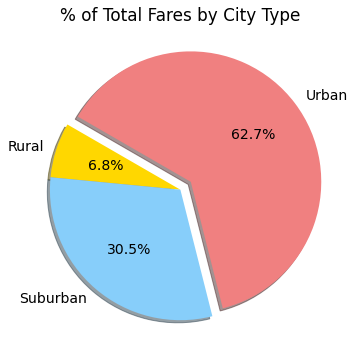

In [310]:
plt.subplots(figsize=(10,6))

plt.pie(type_percents,
        labels = pie_labels,
       colors = ['gold', 'lightskyblue', 'lightcoral'],
       explode=[0,0,0.1],
       autopct = '%1.1f%%',
       shadow = True,
       startangle = 150)

plt.title('% of Total Fares by City Type')
mpl.rcParams['font.size'] = 14

plt.savefig('analysis/Fig5.png', bbox_inches = 'tight', facecolor = 'w')

plt.show()

In [303]:
sum_rides_by_type = pyber_data_df.groupby(['type']).count()['ride_id']
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [304]:
total_rides = pyber_data_df['ride_id'].count()

In [308]:
ride_percents = 100* sum_rides_by_type/total_rides
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

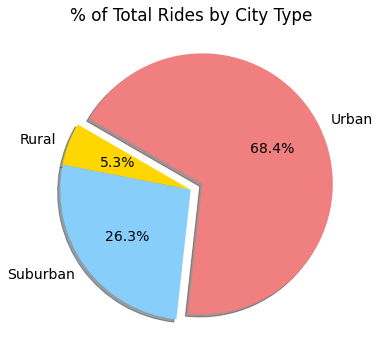

In [311]:
plt.subplots(figsize=(10,6))

plt.pie(ride_percents,
        labels = pie_labels,
       colors = ['gold', 'lightskyblue', 'lightcoral'],
       explode=[0,0,0.1],
       autopct = '%1.1f%%',
       shadow = True,
       startangle = 150)

plt.title('% of Total Rides by City Type')
mpl.rcParams['font.size'] = 14

plt.savefig('analysis/Fig6.png', bbox_inches = 'tight', facecolor = 'w')

plt.show()

In [315]:
count_drivers_by_type = city_data_df.groupby(['type']).sum()['driver_count']

In [316]:
total_drivers = city_data_df['driver_count'].sum()

In [318]:
driver_percents = 100* count_drivers_by_type/total_drivers
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

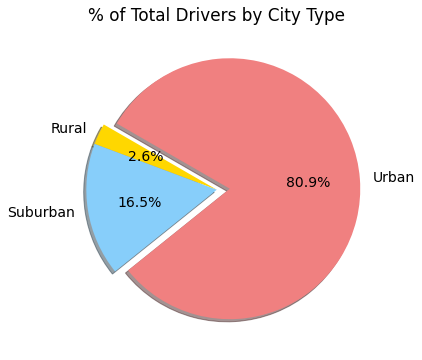

In [319]:
plt.subplots(figsize=(10,6))

plt.pie(driver_percents,
        labels = pie_labels,
       colors = ['gold', 'lightskyblue', 'lightcoral'],
       explode=[0,0,0.1],
       autopct = '%1.1f%%',
       shadow = True,
       startangle = 150)

plt.title('% of Total Drivers by City Type')
mpl.rcParams['font.size'] = 14

plt.savefig('analysis/Fig7.png', bbox_inches = 'tight', facecolor = 'w')

plt.show()